Q.1: Import data and check null values, column info, and descriptive statistics of the data.

In [1]:
import pandas as pd

df=pd.read_csv('userbehaviour.csv')
print('Null Values:')
df.isnull().sum()

print('Columns Info:')
df.info()

print('Descriptive Statistics:')
df.describe()

Null Values:
Columns Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   userid                      999 non-null    int64  
 1   Average Screen Time         999 non-null    float64
 2   Average Spent on App (INR)  999 non-null    float64
 3   Left Review                 999 non-null    int64  
 4   Ratings                     999 non-null    int64  
 5   New Password Request        999 non-null    int64  
 6   Last Visited Minutes        999 non-null    int64  
 7   Status                      999 non-null    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 62.6+ KB
Descriptive Statistics:


,userid,Average Screen Time,Average Spent on App (INR),Left Review,Ratings,New Password Request,Last Visited Minutes
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,1500.000000,24.390390,424.415415,0.497497,6.513514,4.941942,5110.898899
std,288.530761,14.235415,312.365695,0.500244,2.701511,2.784626,8592.036516
min,1001.000000,0.000000,0.000000,0.000000,0.000000,1.000000,201.000000
25%,1250.500000,12.000000,96.000000,0.000000,5.000000,3.000000,1495.500000
50%,1500.000000,24.000000,394.000000,0.000000,7.000000,5.000000,2865.000000
75%,1749.500000,36.000000,717.500000,1.000000,9.000000,7.000000,4198.000000
max,1999.000000,50.000000,998.000000,1.000000,10.000000,15.000000,49715.000000


Q.2: Check the highest, lowest, and average screen time of all the users.

In [2]:
print('Highest Average Screen Time:', df['Average Screen Time'].max())
print('Lowest Average Screen Time: ', df['Average Screen Time'].min())
print('Average, Average Screen Time', df['Average Screen Time'].mean())

Highest Average Screen Time: 50.0
Lowest Average Screen Time:  0.0
Average, Average Screen Time 24.39039039039039


Q.3: Check the highest, lowest, and the average amount spent by all the users.

In [3]:
print('Highest Average amount spent: ',df['Average Spent on App (INR)'].max())
print('Lowest Average amount spent: ',df['Average Spent on App (INR)'].min())
print('Average, Average amount spent: ',df['Average Spent on App (INR)'].mean())

Highest Average amount spent:  998.0
Lowest Average amount spent:  0.0
Average, Average amount spent:  424.4154154154154


Q.4: Now check the relationship between the spending capacity and screen time of the active users
and the users who have uninstalled the app. Also explain your observation.

In [4]:
import plotly.express as px

fig1=px.scatter(df, x='Average Screen Time', y='Average Spent on App (INR)', trendline='ols', color='Status', size='Average Spent on App (INR)', title='Relationship between Spending Capacity and Screen Time')
fig1.show()

The above relationship is showing that with the increasing of Screen Time, the Spending capacity is also increasing.

Q.5: Now check the relationship between the ratings given by users and the average screen time.
Also explain your observation.

In [5]:
fig2=px.scatter(df, x='Average Screen Time', y='Ratings', trendline='ols', color='Status', size='Ratings', title='Relationships between Ratings and ScreenTime')
fig2.show()

The above plot is showing relationships between Ratings and Screen time. With the increase of Users Screen time, the rate of Ratings is also increasing.

Q.6: Now move forward to App User segmentation to find the users that the app retained and
lost forever. You can use the K-means clustering algorithm in Machine Learning for this task.
Also, tell the number of segments you have got.

In [6]:
from sklearn.cluster import KMeans

X = df[['Average Spent on App (INR)','Last Visited Minutes']]

num_cluster=3

kmeans_final = KMeans(n_clusters=num_cluster, random_state=42)
kmeans_final.fit(X)

df["Cluster"] = kmeans_final.labels_

segment_counts = df['Cluster'].value_counts()
print(f'Number of segments: {num_cluster}')
print(segment_counts)

retained_users = df[df['Cluster'] == 0]
print(f'Retained users: {len(retained_users)}')

uninstalled_users = df[df['Cluster'] == 1]
print(f'Uninstalled users: {len(uninstalled_users)}')


C:\Users\khati\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Number of segments: 3
Cluster
0    910
2     45
1     44
Name: count, dtype: int64
Retained users: 910
Uninstalled users: 44


Q.7: Now visualize the segments.

In [7]:
Cluster_color=df['Cluster'].map({
    0:'Retained',
    1:'Need Attention',
    2:'Churn'
})
fig3=px.scatter(df, x='Last Visited Minutes', y='Average Spent on App (INR)', color=Cluster_color)
fig3.show()

Q.8: Explain the summary of your working.
Ans: Above steps provide a systematic approach to understanding and segmenting app users based on their behavior, which can help in identifying patterns, making informed decisions, and improving user engagement strategies.

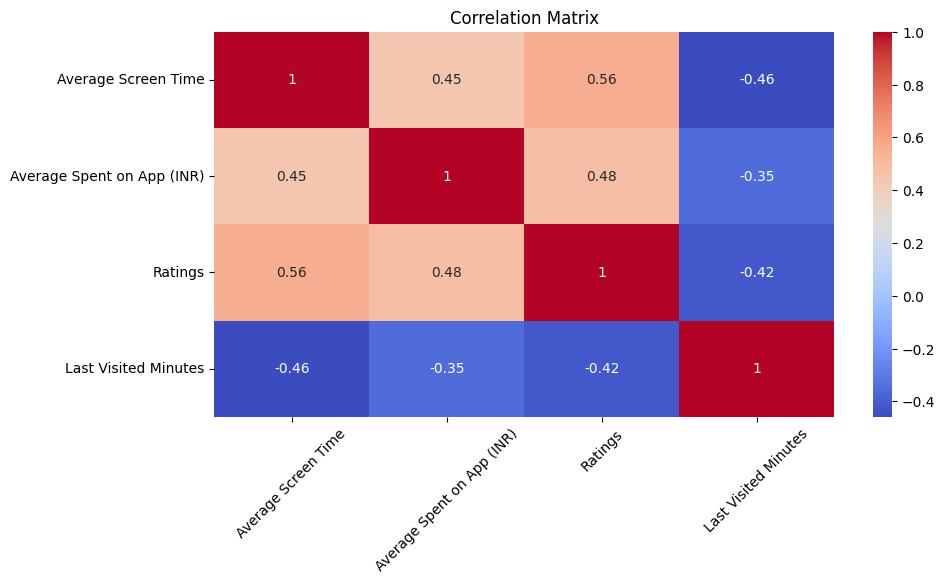

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix=df[['Average Screen Time','Average Spent on App (INR)','Ratings','Last Visited Minutes']].corr()

plt.figure(figsize=(10,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.xticks(rotation=45)
plt.show()

By examining the correlation matrix, we can gain insights into which metrics are related and how strongly they are associated. These insights can guide further analysis and decision-making processes related to app optimization and user engagement strategies.

Q.7: Now, detect anomalies in App User Segmentation. You can use various techniques for anomaly
detection. A simple and effective method is the Isolation Forest algorithm, which works well with
different data distributions and is efficient with large datasets.

In [18]:
from sklearn.ensemble import IsolationForest

X = df[['Average Screen Time', 'Last Visited Minutes','Average Spent on App (INR)','Ratings']]

isolation_forest = IsolationForest(contamination=0.1)
isolation_forest.fit(X)

anomaly_labels = isolation_forest.predict(X)


df['Anomaly'] = anomaly_labels

print("Anomalies:")
print(df[df['Anomaly'] == -1])


Anomalies:
     userid  Average Screen Time  Average Spent on App (INR)  Left Review  \
1      1002                  0.0                        54.0            0   
25     1026                 48.0                        73.0            1   
38     1039                  1.0                        97.0            0   
43     1044                  4.0                        93.0            0   
46     1047                  3.0                        34.0            1   
..      ...                  ...                         ...          ...   
947    1948                  2.0                         3.0            1   
949    1950                  0.0                        95.0            0   
956    1957                  2.0                        31.0            0   
978    1979                  1.0                        73.0            0   
979    1980                  2.0                        43.0            1   

     Ratings  New Password Request  Last Visited Minutes       S